# MLCourse Lab 1

In [ ]:
# Import everything in one cell
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Note: if this gives you errors, then scroll down to the section on environments

## Introduction
This lab is intended to give you an overview of the toolkit and general way of working we'll use in the assignments in this course. It is not graded.

What you will learn:
* Using unit tests to validate your code
* An overview of the key packages in the Python machine learning stack
* Applying some ML basic models
* Visualizing your results
* Code style standards
* What kind of editors to work with
* The concept of a replicable working environment
* How to submit your work (it's not graded, but you can test the workflow)


Read the lab below and run the cells to see what happens.

## Unit Tests
During this course we will make extensive use of **unit tests** to test if your code is working correctly. A unit test is a test that tests one single piece of a program, by providing it some inputs and then checking if it provides the expected reactions. For example, consider this function as our "unit" to test:

In [ ]:
def plus_one(number):
    return 1 + number

We can test if it behaves as it should by using `assert` statements. For example:



In [ ]:
assert plus_one(1) == 2
assert plus_one(10) == 11

When we execute the code and the assertion is satisfied, it continues silently. If it doesn't return what we expected, then it raises an error:

In [ ]:
assert plus_one('two') == 'three'

We can use this as a method of developing a program. It works like this:

1. Decide what you want the function to do.
2. Write the absolute minimum skeleton of the function.
3. Write the unit tests.
4. Try out the unit tests. **They should fail** because you haven't really built your function yet. If the tests pass before you even made the function, then your tests are clearly broken.
5. Work on your function.
6. Try the tests. If any of them fail, go back to 5.
7. Done.

#### Exercise 1
Take the following code skeleton and develop the `hello` function until it passes the tests.

In [ ]:
def hello():
    pass

assert hello('World') == 'Hello World!'
assert hello('you') == 'Hello You!'

## A tour of the tech stack
Not every ML project uses the same packages of course, but these are particularly common:

### Numpy
Numpy is the workhorse for all the other packages. The most important thing that numpy does is implement **arrays**. You've probably seen arrays in C++ before, and they seemed much less flexible than Python lists right? That's true, you can put only one kind of data in an array (integers, strings, Booleans..), while lists are more flexible. 

But this limitation has an advantage: the size of each element is completely predictable. If you have an array that will only contain 64-bit floating point numbers, you know exactly how much memory you need for that. And you can put all those numbers next to each other in the memory. 

This allows you to access them much faster than the elements of a list. Because in a list every element could be a different size, and the size of an element in the middle could change if you assign something else to it. For example:

In [ ]:
my_list = [1, 2, 3]
my_list[1] = 'foo'
print(my_list)

So the length of memory you'd need to store the elements of a list is a bit harder to predict, which makes accessing them a  it slower.

Another big contribution of numpy is that it has a lot of highly optimized C code hidden under the hood, that lets you do math with the easy writing of Python but the speed of C.

Let's take a look at some example code. We start out by importing **numpy**, and this is commonly done as:

In [ ]:
import numpy as np

The "as np" renames the numpy *namespace* to np, so that we can be a bit more brief. This is nice because we might be calling a lot of numpy functions nested together in one line.

Now let's see what a numpy array looks like:

In [ ]:
a = np.arange(10)  # tell numpy to make numbers from 0 up to but not including 10
print(a, '\n')
b = np.array([1, 2, 3])  # you can also turn a list into an array
print(b, '\n')
c = np.zeros(shape=(10,5))  # arrays can be multi-dimensional
print(c)

Okay, so arrays look a lot like lists or matrices, guaranteed to contain only one type of data.

#### Speed benefits of numpy
Now let's take a look at these supposed speed benefits:

In [ ]:
a = np.arange(100000)  # make an array filled with the numbers 0...99999
%timeit np.sum(a)  # sum all these numbers

the `%timeit` is what is known as a "magic command". It's a function of jupyter notebook that allows us to measure how long a piece of code takes to run. We can also apply it to a whole cell with %%:

In [ ]:
%%timeit
a = np.arange(100000)
b = np.arange(100000)
np.sum(a) + np.sum(b)

Now let's compare that to Python lists:

In [ ]:
a = list(range(100000))  # make a list with the numbers 0...99999
%timeit sum(a)

Even the basic Python version doesn't take that long, because this is still a toy example. But you can see the difference, and when we start using much bigger amounts of data it adds up quickly.

#### Selecting parts of a numpy array
You can also use slices to select parts of an array, just like you can with a list:

In [ ]:
a = np.arange(10)
print(a[2:5])

But there's also something you can do with arrays, that you can't do with a list: select using a sequence of indices:

In [ ]:
a = np.arange(10)
print(a[[1, 7, 4]])  # print elements 1, 7 and 4 from the array, in that order

b = list(range(10))
# print(b[[1, 7, 4]])  # this will give an error

Being able to select elements in that order is nice, because it allows you to for example make a random selection:

In [ ]:
a = np.array(['a', 'b', 'c', 'd', 'e'])  # numpy arrays can also hold strings
b = np.random.choice(5, size=2, replace=False)  # 2 random numbers from the range [0, 4], without replacement
print(b)
print(a[b])

We can also select from an array using a sequence of Booleans, where only the array elements at "True" places get returned:

In [ ]:
a = np.arange(10)
b = [False, True, True, False, False, False, True, True, False, False]
print(a[b])

#### Element-wise operations
Another of the defining features of numpy is the ability to do **element-wise** operations on a whole array at once. For example:

In [ ]:
a = np.arange(10)
even = a % 2 == 0  # 'True' for each number in a that is fully divisible by 2
print(even)

#### Conditional Selection
We can put this together with the Boolean selection we showed above, and use it to select part of an array based on some test:

In [ ]:
a = np.arange(10)
even_indices = a % 2 == 0
print(even_indices)

even_numbers = a[even_indices]  # select items from a that are True
print(even_numbers)

In practice, we tend to write this a bit more concisely:

In [ ]:
a = np.arange(10)
even_numbers = a[a % 2 == 0]
print(even_numbers)

#### Views vs. Copies
Depending on how you select from an array, you may get a **view** or a **copy**.
* If you modify a view of an array, you also change the original. The view is just a different way of looking at the original object.
* If you modify a copy of an array, the original isn't changed. The copy is a new object.

In [ ]:
a = np.asarray([1, 2, 3, 4, 5])
print('a', a)
b = a[1:3]  # we get a view
print('b', b)
b[0] = 10
print('b', b)
print('a', a)  # look, 'a' has been changed!

In [ ]:
a = np.asarray([1, 2, 3, 4, 5])
print('a', a)
b = a[[1, 2]]  # we get a copy because we used "fancy indexing"
print('b', b)
b[0] = 10
print('b', b)
print('a', a)  # look, 'a' was NOT changed!

In [ ]:
a = np.asarray([1, 2, 3, 4, 5])
print('a', a)
b = a[1:3].copy()  # we explicitly ask for a copy
print('b', b)
b[0] = 10
print('b', b)
print('a', a)  # look, 'a' was NOT changed!

The middle example used what is called "fancy indexing". The bottom example used an explicit copy statement. The Zen of Python says that *Explicit is better than implicit*, and it's true, it's much more easy to see that the third example will make a copy than the second one. It's also an example of *in the face of ambiguity, refuse the temptation to guess*.

There is a way of testing whether one array is a view of another one. You can ask if one array `is` the `base` of another:

In [ ]:
a = np.asarray([1, 2, 3, 4, 5])
b = a[1:3]
b.base is a

In [ ]:
a = np.asarray([1, 2, 3, 4, 5])
b = a[[1, 2]]
b.base is a

Obviously, mixing up whether you're using a view when you should be using a copy is going to cause some strange bugs in your code. So what are advantages of views?
* You don't have to copy all that data to a new place in memory. This saves time when handling large arrays.
* You don't need memory to hold *both* arrays. Again, with large arrays this is helpful.

So depending on what exactly you want to do, either one would be the right answer. If you know you're not going to modify the selected data, then it's safe to use a view. This happens quite often actually, if it's just an input value for another calculation.

#### Assignment to parts of the array at once
Since we're able to select whole parts of an array, we can also use that to assign to all of it at once. For example:

In [ ]:
a = np.zeros(10)
print(a)
a[2:5] = 5  # assign one element to the whole selection
print(a)
a[5:7] = [6, 7]  # assign a sequence of the same length as the selected target
print(a)

#### Exercise 2: rolling an array
Implement code inside the `roll_array` function so that it passes the unit tests. The idea of "rolling" an array is moving all the values in it either to the right, or left. Values that would fall out on one end are put in on the other end. For example, if we rolled (1, 2, 3, 4) one space to the right we'd get (4, 1, 2, 3).

In [ ]:
def roll_array(array, steps, direction='left'):
    '''Roll the contents of a 1D array, "steps" steps in the given direction, wrapping around. '''
    raise NotImplementedError('Your code here')
    return rolled_array

a = np.arange(10)
print(a)

assert np.array_equal(
    roll_array(a, 2, 'right'),
    np.asarray([8, 9, 0, 1, 2, 3, 4, 5, 6, 7])
)

assert np.array_equal(
    roll_array(a, 4, 'left'),
    np.asarray([4, 5, 6, 7, 8, 9, 0, 1, 2, 3])
)

### Pandas
The next commonly used package is pandas. Pandas is built on top of numpy; on the inside of a pandas DataFrame the data is stored in numpy arrays. Let's look at some example code:

In [ ]:
import pandas as pd

In [ ]:
some_data = np.reshape(np.arange(20), (-1, 4))  # make a 2d numpy array
print(some_data, '\n\n')

df = pd.DataFrame(data=some_data, columns=['col1', 'col2', 'col3', 'col4'])  # make a pandas DataFrame
df  

You can think of numpy as being like a vector or matrix in a mathematical sense. Pandas is more like a spreadsheet, although it also has some tricks that may remind you more of a database system like SQL.

We called out dataframe `df`. This is quite common practice because it's nice and short. You often end up using the same dataframe multiple times in a single line, so a long variable name isn't helpful then. However, if you're using multiple dataframes, make sure to give them informative names.

It's got two main data types: the DataFrame (a table) and the Series (one column or row). But underneath it's numpy, and you can extract numpy arrays from it again:

In [ ]:
a = df['col1'].values
type(a)

So what's the point of Pandas? Convenience, mostly. Numpy stands for "numeric python" and it's rather low-level. Pandas is an abstraction layer on top of it that gives you more convenient  and human-understandable ways to handle data. For example:
* Having names on columns
* Being able to index rows by date
* Quick statistical summaries of the contents of your table
* Ability to merge two pandas dataframes much like you might join tables in SQL.
* Ability to output a table into fully formatted LaTeX code. (This is an amazing work-saver.)
* Easy import and export of CSV and other spreadsheet files.
* Some built-in plotting functionality.
* Ability to aggregate rows in ways similar to SQL.

Mastering all the tricks in pandas will take some time. Here we'll just cover a couple of key functions needed to get you started. Let's start with some handy preview functions for viewing datasets.

In [ ]:
df.head(3)  # show only the first 3 lines

The `head` function shows a couple of rows in the dataset, which can be handy when you need a quick look at what's in there but printing thousands of rows isn't really useful. There is also a `tail` function that works the same, but at the bottom of the frame.

In [ ]:
print(df.info())

The `info` function gives you an overview of what's in your columns. The non-null column shows you whether there are missing values in your data, and the Dtype column shows what kind of data there are. Since we built this dataframe from integers, that's what it says there. Other datatypes are for example floats, datetime and object. Remember that since pandas uses numpy under the hood, everything in one column has to be the same datatype. If there are in fact things with different datatypes in a column, then pandas uses the super-broad datatype "object" that can fit any of the other datatypes. So if you see "object" as a datatype in this function, you might have to do some more data preprocessing.

In [ ]:
print(df.describe())

The `describe` function gives a quick statistical overview of your columns.

The other topic is how to **select** in pandas. This can be a bit confusing, because there are multiple ways to do it. The main ways are:
- with brackets
- with the dot
- with `loc`
- with `iloc`

Each of these has its own uses, although with `loc` and `iloc` you can do everything that the others could - those are more like a shorthand. We'll give a brief explanation of each.

#### Using `.iloc`
iloc stands for integer location. You indicate the part of the dataframe you want to select using its integer index. This is quite similar to accessing an element in numpy or even a nested list.

In [ ]:
df.iloc[0:3]  # select rows 0 to 3

In [ ]:
df.iloc[[0, 3]]  # select row 0 and 3. Notice the inner list!

In [ ]:
df.iloc[:, 0:3]  # select columns 0 to 3. Notice the : to the left that selects all rows

In [ ]:
df.iloc[:, [0, 3]] # select columns 0 and 3. Notice both the inner list and : to the left

In [ ]:
df.iloc[1, 2] # select cell (1,2)

In [ ]:
df.iloc[2:4, 0:2]  # select the cells on rows 2 to 4, columns 0 to 2

You may have noticed that `iloc` doesn't care that we called our columns "col1"; as far as iloc is concerned, counting starts at 0 and the names of the columns are not important.

#### Dots
With dots we can quickly select a single column by name. This can be convenient because it's very compact writing, but apart from that it's a bit limited.

In [ ]:
df.col3  # select col3

#### Brackets
With brackets we can also select columns by name. However, we can do a bit more with it than with the dot notation.

In [ ]:
df['col1']  # select the column named 'col1'

In [ ]:
df[['col1', 'col3']]  # select col1 and col3

In [ ]:
df[['col3', 'col1']]  # we can select the columns in a different order

#### Using `.loc`
`loc` is one of the most powerful ways of accessing a pandas dataframe. While `iloc` selected by integer-index, `loc` selects by **label**.

The notation for using loc uses either `.loc[row labels]` as style when we're only selecting some rows,  `.loc[:, column labels]` when we only want to select columns, or `.loc[rows, columns]` when we want to select both.

One pitfall when using `.loc` to access a slice, like `.loc['col1':'col3']`, is that the selection *includes* the last element, so you'd get three columns this way. This makes it different from most other slice notation in Python.

In [ ]:
df.loc[0]  # show the row named '0'

In [ ]:
df.loc[0:2]  # show all the rows starting at the row labeled '0', up to and INCLUDING '2'

In [ ]:
df.loc[:, 'col1']  # show col1

In [ ]:
df.loc[:, 'col1':'col3']  # show columns starting at the one labeled 'col1' up to and INCLUDING 'col3'

In [ ]:
df.loc[:, ['col1', 'col3']]  # show 'col1' and 'col3'

In [ ]:
df.loc[:, ['col3', 'col1']]  # we can also change the order

You'll notice that using `.loc` to access rows didn't look that different from using `.iloc`. This is because we didn't explicitly define the indices of our rows, so they were initialized by pandas starting at 0. But we can explicitly name the rows:

In [ ]:
num_rows = df.shape[0]  # shape tells you the  (numer of rows, number of columns) of the DataFrame
print(num_rows)

new_nums = reversed(range(num_rows))  # get the numbers 0-4, but reversed

names = [f'row{i}' for i in new_nums]  # use a "list comprehension" to build a list of names
print(names)

df.index = names  # change the index
df

Now let's look at what `.loc` and `.iloc` do:

In [ ]:
df.loc['row0':'row2']  # nothing, because row2 comes before row0

In [ ]:
df.loc['row0':'row2':-1]  # walk in reverse order, now we get rows

In [ ]:
df.iloc[0:2]  # we just get the first two rows in the table, regardless of the labels in the index

#### Conditional selection with `.loc`
One of the most powerful things we can do with `.loc` is conditional selection. Basically, we use some conditions which when evaluated against the dataframe, give a True or False on whether that part of the frame should be included. For example:

In [ ]:
div3 = df.col3 % 3 == 0  # True if the element in col3 is divisible by 3

df.loc[div3]  # Perform the selection

In [ ]:
df.loc[df['col1'] > 10]  # select rows where col1 > 10

In [ ]:
df.loc[df['col1'] % 3 == 0, ['col2', 'col3']]  # select col2 and col3 only if col1 is divisible by 3

In conclusion, the four different ways of accessing pandas data are:
* dot notation, which can only select a single column but is really short and easy to read.
* bracket notation which gives some more freedom in selecting columns
* `.loc` notation which allows you to select based on both row and column labels and use conditionals
* `.iloc` notation which allows you to select based on integer-indexed location regardless of labels

Each is useful in some circumstances but it can take some practice to become comfortable with all of them.

#### Assigning to selections
There are a couple of ways you can assign data into parts of a pandas dataframe. The obvious one is to select a part of the existing dataframe and just assign to it:

In [ ]:
temp = pd.DataFrame({'a': np.arange(10), 'b':np.arange(20, 30)})
print(temp, '\n')
temp.iloc[2:4,1] = 50  # select rows 2 to 4, column 1, and assign 50 to it
print(temp)

There is one other way that is used very commonly, and that is adding a whole column to it:

In [ ]:
temp['c'] = np.arange(50, 60)  # create a new column and assign some data to it
print(temp)

It's possible to append rows to a dataframe as well, but this isn't as commonly done.

#### Exercise 3
You have a dataframe with some height and width information and a class label, and you want to select only the class labels of items with a surface of at least `min_surface`. Complete the function body so that it passes the unit tests.

In [ ]:
df = pd.DataFrame({
    'height':[1, 2, 3, 4, 5], 
    'width':[5, 4, 8, 10, 1], 
    'class_labels': ['a', 'b', 'c', 'a', 'a']
})
print(df)


def surface_class(frame, min_surface):
    ''' Return the class labels of all rows with a surface >= least min_surface '''
#     surface = df['height'] * df['width']
#     enough = surface >= min_surface
#     labels = frame.loc[enough, 'class_labels']
    raise NotImplementedError('Your code here')
    return labels



labels = np.asarray(surface_class(df, 8))
target = np.asarray(['b', 'c', 'a'])
assert np.array_equal(labels, target), f"{labels} != {target}"

labels = np.asarray(surface_class(df, 9))
target = np.asarray(['c', 'a'])
assert np.array_equal(labels, target), f"{labels} != {target}"

labels = np.asarray(surface_class(df, 24))
target = np.asarray(['c', 'a'])
assert np.array_equal(labels, target), f"{labels} != {target}"

labels = np.asarray(surface_class(df, 25))
target = np.asarray(['a'])
assert np.array_equal(labels, target), f"{labels} != {target}"


### Matplotlib
We use matplotlib to make plots. For example:

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(10)
y = x * x
plt.plot(x, y)
plt.show()

Notice that we import the `pyplot` subpackage. This is a legacy thing, matplotlib was originally more heavily based on MATLAB. The pyplot subpackage is the more modern element that we mostly use.

The basics of plotting is pretty simple; you use the `plot` or `scatter` and pass two sequences, that determine the X and Y coordinates of the points to be plotted. The `plot` command interpolates a line between them while `scatter` makes a scatterplot.

We can also add many different types of styling to a plot. Some of the most common ones are:
* color
* marker (like the stars below)
* linestyle
* label (in the legend)

In [ ]:
x = np.random.randn(100)  # make 100 normally distributed random points
y = np.random.randn(100)
plt.scatter(x, y, color='red', label='a', marker='*')
plt.legend() # indicate that we want a legend in the plot
plt.grid() # add a grid to the plot
plt.plot()

A good plot always has a couple of things:
* Label on the X axis
* Label on the Y axis
* If either axis is expressed in some kind of unit, like centimeters, grams, seconds - then you should note that.
* A title
* A caption (although you typically add this in the report, not when generating it)
* A legend, especially if you're plotting more than one line

In [ ]:
x = np.arange(100)
y1 = (x * 1.5) + 30
y2 = (x * 2) + 10
plt.plot(x, y1, label='blue car', color='blue')
plt.plot(x, y2, label='red car', color='red')
plt.title('Red ones go faster!')
plt.xlabel('time (s)')
plt.ylabel('distance (km)')
plt.legend()
plt.plot()

### Scikit-Learn
Scikit-Learn, also known as `sklearn` is a package with many tools for machine learning, such as functions to prepare data for machine learning, error measures, example datasets, and many machine learning algorithms. During this course we will use this package extensively. It's the heart of the modern Python machine learning world.

### SciPy
SciPy is the Scientific Python package. It contains a lot of optimized functions for for example signal processing. Where SciKit-Learn focuses more on machine learning, SciPy is more of a general physics/engineering sort of package that we occasionally use a function from.

### ... and many others
There are many more packages that will receive some attention later during this course, for example:

- **TensorFlow**, another workhorse package like numpy. It's named after "tensors", which are a generalization of the idea of vectors and matrices to any number of dimensions. One of its key features is allowing the use of GPUs and even TPUs for machine learning.
- **Keras** is usually run on top of TensorFlow and is a package for the easy construction of neural networks. If TensorFlow is like Numpy, then Keras is like Scikit-Learn.
- **PyTorch** provides similar functionality to TensorFlow/Keras.
- **Auto-Sklearn** is a sort of wrapper around Scikit-Learn that can automate many of the tasks of selecting the best algorithm and configuration to use for any given machine learning task.

## Synthetic data: signal and noise
One way of viewing a machine learning problem is to assume that the observations that we have in our dataset are a combination of *signal* and *noise*.

### The convenience of a load_data function
It can happen pretty often that you're altering your data a bit while doing experiments. Especially in Jupyter Notebook you often use some cells out of order (gasp!) and then your data can get a bit messy. An easy way to to work around this is to just write a simple function around loading/preparing/generating your data that you can call to get a fresh copy. For example:

In [ ]:
def generate_data(
    amount=100, proportion=0.7, # By default we want 70% class a, 30% class b
    signal_a_height=5, signal_a_width=10, a_noise=2,
    signal_b_height=4, signal_b_width=6, b_noise=3,
    random_state=42  # by default, always generate the same data
):
    if random_state is not None:
        np.random.seed(random_state)
    
    # Calculate how many instances of each class to generate
    a_amount = int(amount * proportion)
    b_amount = amount - a_amount
    
    # Generate instances of class a
    # The height and width are the sum of signal + noise
    a_height = signal_a_height + (np.random.randn(a_amount) * a_noise)
    a_width = signal_a_width + (np.random.randn(a_amount) * a_noise)
    a_labels = np.full(a_amount, 'a')
    
    # Do the same for b
    b_height = signal_b_height + (np.random.randn(b_amount) * b_noise)
    b_width = signal_b_width + (np.random.randn(b_amount) * b_noise)
    b_labels = np.full(b_amount, 'b')

    # Wrap it up in a nice dataframe
    df = pd.DataFrame({
        'height': np.concatenate([a_height, b_height]),
        'width': np.concatenate([a_width, b_width]),
        'label': np.concatenate([a_labels, b_labels])
    })
    return df

print(generate_data())

Let's see what this looks like if we plot it with matplotlib:

In [ ]:
df = generate_data()
plt.figure(figsize=(10,10))

for label, mark in zip(['a', 'b'], ['+', 'o']):
    instances = df.loc[df['label'] == label]
    plt.scatter(instances['width'], instances['height'], marker=mark, color='black', label=label)
plt.legend()
plt.xlabel('width')
plt.ylabel('height')
plt.show()

## The basics of classifiers
When you start working with Scikit-Learn, you'll notice that although the many machine learning algorithms are quite different in theory, in practice, you can use them in much the same way. They all have some functions in common, so those were also given the same names. Scikit-Learn applies object-oriented design principles to Machine Learning; you don't have to know all that much about what's inside an object to use it.

### A majority classifier
Let's consider a really simple classifier. This classifier just determines what the most common label was in the training set, and predicts every new instance to be the same as that. It *should* be right more than 50% of the time, if the test data is similar to the training data.

In [ ]:
class MajorityClassifier:
    """ Majority classifier: classifies everything with the majority label from the training set. """
    def __init__(self):
        self.majority_label = None

    def fit(self, x_train, y_train):
        """ Determine which is the majority label in the training set. """
        unique_labels, label_frequencies = np.unique(y_train, return_counts=True)
        majority_index = np.argmax(label_frequencies)
        self.majority_label = unique_labels[majority_index]

    def predict(self, x_test):
        """ Predict the trained majority label in all cases. """
        prediction = np.full(x_test.shape[0], self.majority_label)
        if isinstance(x_test, pd.DataFrame):
            return pd.Series(prediction)
        return prediction  # as a numpy array

Let's analyze what's happening here.

- In `__init__` we make a call to `super().__init()__()` which means we look at the parent of this class and also execute that init function. After that, we create a variable `self.majority_label`.
- In `fit` we use some convenient `numpy` functions to determine the most frequent label and memorize it in `self.majority_label`.
- In `predict` we use `np.full` to make an entire array filled with the same value: the label of the majority class that we stored in the `fit` method.

Let's see this classifier in action on our synthetic data:

In [ ]:
# Make some training data
train = generate_data()
x_train = train[['height', 'width']]
y_train = train['label']

# Make some new data to test with
test = generate_data(random_state=43)  # we want different test data
x_test = test[['height', 'width']]
y_test = test['label']


classifier = MajorityClassifier() # Initialize
classifier.fit(x_train, y_train)  # Larn from the training data

prediction = classifier.predict(x_test)  # Make a prediction about the test data

Okay, now we have a prediction, what do we do with it? We can visualize it! In fact, let's write a visualization function.

In [ ]:
def visualize(x_test, y_test, prediction):
    # Now let's inspect the result
    plt.figure(figsize=(10,10))
    color_map = {'b': 'red', 'a': 'blue'}
    marker_map = {'a': '+', 'b': 'o'}

    # place the scatter points one by one
    for i in range(len(prediction)):
        y_coord = x_test.iloc[i, 0]  # height
        x_coord = x_test.iloc[i, 1]  # width
        true_label = y_test.iloc[i]
        predicted_label = prediction.iloc[i]
        plt.scatter(
            x_coord, y_coord, 
            color=color_map[predicted_label], marker=marker_map[true_label],
            label=f'predicted {predicted_label} / true {true_label}'
        )

    # this is a trick to make sure we don't get duplicate handles in the legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    
    plt.xlabel('width')
    plt.ylabel('height')
    plt.show()

In [ ]:
visualize(x_test, y_test, prediction)

Is this a good result? Well.... it's correct most of the time on the test set, since label `a` is also the majority label in the test set. If our test set had more of label `b` this classifier would do really poorly though.

### Final Exercise: A nearest-neighbor classifier
In this exercise you're going to make a somewhat better classifier. The "nearest neighbor classifier" (1NN) finds, for each instance in the test set, the nearest instance in the training set, and outputs the label of that training instance as its prediction.

In [ ]:
class OneNearestNeighborClassifier:
    def __init__(self):
        self.y_train = None
        self.x_train = None

    def fit(self, x_train, y_train):
        """ To fit, we just store the entire training data. """
        self.x_train = x_train
        self.y_train = y_train

    def distance(self, a, b):
        """ Return the Euclidean distance between point a and b """
        return np.sqrt(np.sum((a - b)**2))

    def predict(self, x_test):
        """ Predict the label of test instances 
        
        For each test instance, find the nearest point in the training set.
        Then return a list of the labels of the nearest points that you found.
        """
        prediction = []
        raise NotImplementedError('Your code here')


        
        if isinstance(x_test, pd.DataFrame):
            return pd.Series(prediction)
        return np.asarray(prediction)  # as a numpy array

In [ ]:
# Make some training data
train = generate_data()
x_train = train[['height', 'width']]
y_train = train['label']

# Make some new data to test with
test = generate_data(random_state=43)  # we want different test data
x_test = test[['height', 'width']]
y_test = test['label']


clf = OneNearestNeighborClassifier() # Initialize
clf.fit(x_train, y_train)  # Larn from the training data

prediction = clf.predict(x_test)  # Make a prediction about the test data

visualize(x_test, y_test, prediction)  # visualize it using our function

Now take a look at how the 1NN classifier performs when the test data does *not* have the same class distribution as the training data. Consider how well it can cope, and how well would the majority classifier cope?

In [ ]:
# Make some training data
train = generate_data()
x_train = train[['height', 'width']]
y_train = train['label']

# Make some new data to test with
test = generate_data(random_state=43, proportion=0.3)  # switch to class b as the most common
x_test = test[['height', 'width']]
y_test = test['label']


clf = OneNearestNeighborClassifier() # Initialize
clf.fit(x_train, y_train)  # Larn from the training data

prediction = clf.predict(x_test)  # Make a prediction about the test data

visualize(x_test, y_test, prediction)  # visualize it using our function

## Code style
Unlike for example C++ where people just can't agree exactly what the best way is to place brackets, for Python there is just one key standard for how good clean code looks like: PEP8. PEP stands for Python Enhancement Proposal. You can find the official description [here](https://www.python.org/dev/peps/pep-0008/). A bit lighter reading version that gives more explanation is [here](https://realpython.com/python-pep8/).

Writing clean code is important. It's very common that you find yourself doing some project and thinking, "hey, I solved this little problem in another problem two months ago, how did I do that again?" If you wrote nice clean code, it's easy to look up how you did it. Likewise, if you're working together with people, it's easier if you understand what others are doing. Adhering (sensibly) to PEP8 makes this easy.

The original PEP8 standard assumes a 80-character line limit, but with modern screens, it's reasonable to assume a 120 character line limit.

Python also has a very definite philosophy behind it, and knowing that philosophy will make it easier to understand how a lot of things are designed in Python. It's called The Zen of Python, officially documented as PEP20, and can be found [here](https://www.python.org/dev/peps/pep-0020/) and there are many essays explaining these 19 statements, for example [here](https://inventwithpython.com/blog/2018/08/17/the-zen-of-python-explained/). Note though that every article explaining them is subtly different. They're intended to make you think, not blindly follow :)

## Picking a good code editor
A good editor will make your life much easier. You could do most of your Python editing in Notepad, Gedit, or another "dumb" editor. The editor is pretty easy to use, you don't have to learn a new program. Sound convenient? Sure, but you're missing out on some tools to find bugs. For example, what's wrong with this code?

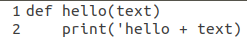

Now let's suppose that you have minimal syntax highlighting, like you have in Jupyter Notebook/Google Colab or even Gedit when your syntax highlighting is set up correctly:

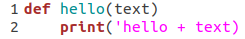

It's already easier to to spot "the problem". Now let's look at the same code in PyCharm:

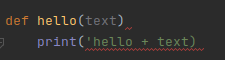

Aside from Dark Mode *obviously* being superior :P we get a lot of information here. PyCharm's syntax highlighting is more precise, distinguishing between keywords like `def`, function names like `hello`, unused variables like `text`, function calls like `print`, strings like `hello + text)`. 

But it's now also obvious that there is *also* a problem in the first line: there's a `:` missing in the function definition.

This is only the smallest bit of what a good IDE (integrated development environment) can do for you. They can also do things like:
- Keep control of big projects, by for example finding where you defined a particular function or variable
- Rename all uses of a variable everywhere in your project, if you're cleaning up some code
- Detect when a variable isn't used
- Detect when a variable isn't initialized before being read
- Detect when you're breaking code style guidelines and suggest fixes
- Notice that you forgot to import a package
- Easily do all those Github actions for you
- Tab completion of variable names

The list goes on. Learning a real IDE can be a bit intimidating, but it pays off in many hours of your time saved both with convenience features and because of the problem-solving tools. We're not mandating you use a particular IDE in this course, but you're recommended to pick a good one. Particularly good ones for Python are PyCharm (by Jetbrains) and Visual Studio Code (by Microsoft). Both have free versions available, and if you register for a student version you generally get the full features. There is also plenty of information on the internet on how to use them. Typically just googling on "product name" + "thing you want to do" will get you in the right direction. 

## Python environments
When you start working on more than one project in Python, it can be useful to arrange for separate environments for them. This can be useful or necessary for several reasons:
* Because some package in project A requires an older version of a package Q, while in project B you need a newer version of package Q.
* Because you want to be able to copy your project to a different computer, and it should work the same way there as it does on your primary computer. (Like when we have to grade it...)

If you just install every package user-wide or even system-wide on your computer, that can make it hard to determine what exactly you're using for *this particular project* and what someone would need to install to run your project. This is bad in science, because we want to be able to reproduce experiments. But it's also bad in industry, because you want to be sure that when you develop code in a development environment, that it'll work the same way in the production environment.

Luckily, there are solutions. Less luckily, there are multiple solutions which can get confusing. Teaching each of these goes beyond the scope of this tutorial but you should be at least familiar with the names:
* The Anaconda distribution of Python has the `conda` program to create environments with. These can be exported into a `environment.yml` file, and with this file someone else can re-recreate your environment. You would mostly use the `conda` program to install new packages into this environment. Anaconda comes with most scientific packages for Python already installed, which can make it a bit heavy but also very batteries-included.
* Outside the Anaconda world, people mostly use `pip` to install packages. You can also first set up a *virtual environment* with either `virtualenv` or `venv` (the latter is newer but less widely adopted). Using `pip` you can "freeze" an environment and export it to a `requirements.txt` file. With the requirements file you can then initialize a new environment with the same packages.
* You can also use Google Colab, which is a cloud-based version of Jupyter Notebook with some version control, commenting and collaboration tools added to it. Since it's in the cloud, you can also alter that environment without worrying that it affects your own computer. Like Anaconda, it has a lot of packages already installed, although you can use `pip` to install more as needed.

When explaining what `conda` and `pip` do, it's roughly like this: `conda` installs just about anything, including non-Python software, into an Anaconda environment. Meanwhile `pip` installs only Python packages, into any kind of environment, including Anaconda.

Although we aim for all assignments in this course to be *possible* on Colab, you should investigate which kind of virtual environment you want to use on your own computer and do some tutorials on it, because you'll be able to get better performance from running locally. 

### Good package importing practices
It's quite common in tutorials that you see packages only imported at the moment they're about to be used. In a Jupyter notebook this can be many cells down. This is of course useful for focusing your attention on them. However, it also has a downside; you can't easily look at a file and see what packages you need to run it. And in the case of a notebook, if you're executing cells out of sequence because you're trying to debug something, you often find you need to hunt back and forth to import everything you need.

It's therefore good practice to put one cell near the very top of your notebook with all the package imports you need. You can see an example at the top of this notebook.

## Where to find more information
This lab only covers the beginnings of these packages. You can find a lot more information on the internet; these packages are widely used and well-documented. Good places to look are:
* The official documentation. Just googling for something like `numpy.random`, or a specific function like "numpy random uniform" will turn up the relevant page.
* There are many tutorials available for doing specific things with each of these packages. Again, just searching the internet will usually turn up something.
* Stackoverflow is also a big help.

As you get more experienced you'll probably start leaning more on the official documentation to look up a precise detail, than on tutorials. Although if you're starting a project that uses a technique you haven't used yet, it's good to just read up a bit on it. This software is quite friendly to self-study because there's so much good material on the web.

## How to submit your work
This assignment isn't graded, but you can use this to test the submission workflow for the assignments later in the course.

Take the file `Lab1.py` and put your solutions to the programming exercises in the various functions: replace all `NotImplementedError` instances with your code.

#### Running locally
You can run the tests file to see if it works correctly. From the command line:

```pytest Lab1_tests.py```

You can also run them directly from the notebook by adding a `!` in the cell to push the code in the cell to the command line: `!pytest Lab1_tests.py`.

#### Running on Colab
If you're doing this from Colab, you can upload the Lab1.py and Lab1_test.py files to Colab so that you can run pytest there. To make sure Colab uses the correct version of pytest, use this line:

```!python3 -m pytest Lab1_tests.py```

### Commit & Push
Once you're satisfied that they all work correctly, make a *git commit* of your changes to `Lab1.py` and then *push* them back up to your repository. This will trigger a run of tests in the repository. You can see the result in the "actions" tab. If they all succeed then you're done. If not, then look at the errors, fix them, and commit and push again.

#### How to commit and push
To commit something to git you need to preform two steps: adding the files and then commiting them. You can see a commit as a set of one or more files which have changes in them compared to the orginal version which is hosted in the online git repo.
It is easiest to just add all the changed files to the commit by the following command:

> git add .

This will add all the chagned files in the current git repostoryt to the commit, you can also add a spefic file by just replacing the . with a file name.

After adding you need to make the commit with the following command:

> git commit -m "Describe what is changed in the commmit here"

Note that it is good practise to commit and or push often with clear messages, this way your code is backedup and you can easily revert to older version if you make some changes with unintenial effects.

You can then push this commit to the online git enviroment. Note that only by pushing you can change the online git repository! Just by commiting you only are effecting your local git repostitory.
To push:

> git push
